For the given data ‘MonthWiseMarketArrivals_Clean.csv’, below is attribute 
information: 
 
This dataset is about Indian onion market.Build a time series model for mumbai city.
 
1. Market Name - Market Place Name 
2. Month - Month (January-December) 
3. Year - 1996-2016 
4. Quantity - Quantity of Onion (in Kgs) 
5. priceMin - Minimum Selling Price 
6. priceMax - Maximum Selling Price 
7. Pricemod - Modal Price 
8. State - State of market 
9. City - City of market 
10. Date - Date of arrival



In [1]:

import pandas as pd      # These are the necessary libraries that need to be import
import numpy as np
import warnings
import seaborn as sb
import matplotlib.pyplot as mp
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress=True)

In [2]:
t=pd.read_csv(r'C:\Users\Lenovo\Downloads\MonthWiseMarketArrivals_Clean.csv',header=0,delimiter=',') # IT IS USED TO ACCESS THE FILE
t.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [3]:
t.shape

(10227, 10)

In [4]:
t.head(30)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
5,ABOHAR(PB),January,2013,675,1327,1900,1605,PB,ABOHAR,January-2013
6,ABOHAR(PB),January,2014,440,1025,1481,1256,PB,ABOHAR,January-2014
7,ABOHAR(PB),January,2015,1305,1309,1858,1613,PB,ABOHAR,January-2015
8,ABOHAR(PB),February,2005,1400,286,365,324,PB,ABOHAR,February-2005
9,ABOHAR(PB),February,2006,1800,343,411,380,PB,ABOHAR,February-2006


In [5]:
t.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [6]:
t['year'].value_counts()

2015    1053
2010     813
2014     773
2009     760
2013     740
2007     738
2006     736
2011     733
2012     718
2005     716
2008     685
2004     525
2003     290
2002     256
2016     164
2001     126
1999     124
2000     124
1998     106
1997      35
1996      12
Name: year, dtype: int64

In [7]:
from datetime import datetime   # HERE WE ARE CONVERTING INTO DATE
t['Date'] = pd.to_datetime(t['month'] + ' ' + t['year'].astype(str), format='%B %Y')

In [8]:
t.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date', 'Date'],
      dtype='object')

In [9]:
m=t[t['city']=='MUMBAI']
m

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,Date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004,2004-01-01
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005,2005-01-01
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006,2006-01-01
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007,2007-01-01
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008,2008-01-01
...,...,...,...,...,...,...,...,...,...,...,...
6795,MUMBAI,December,2011,290350,519,994,749,MS,MUMBAI,December-2011,2011-12-01
6796,MUMBAI,December,2012,218500,1048,1609,1330,MS,MUMBAI,December-2012,2012-12-01
6797,MUMBAI,December,2013,226385,1298,1976,1639,MS,MUMBAI,December-2013,2013-12-01
6798,MUMBAI,December,2014,294150,1433,2178,1802,MS,MUMBAI,December-2014,2014-12-01


In [10]:
m=m[['Date','priceMod']]
m

,Date,priceMod
6654,2004-01-01,849
6655,2005-01-01,387
6656,2006-01-01,402
6657,2007-01-01,997
6658,2008-01-01,448
...,...,...
6795,2011-12-01,749
6796,2012-12-01,1330
6797,2013-12-01,1639
6798,2014-12-01,1802


In [11]:
m=m.sort_values('Date')
m

,Date,priceMod
6654,2004-01-01,849
6667,2004-02-01,736
6680,2004-03-01,498
6692,2004-04-01,397
6704,2004-05-01,405
...,...,...
6775,2015-10-01,3748
6787,2015-11-01,2623
6799,2015-12-01,1542
6666,2016-01-01,1215


In [12]:
t['Date'].value_counts()

2015-09-01    97
2015-12-01    93
2015-10-01    90
2015-02-01    90
2015-11-01    89
              ..
1997-06-01     1
1996-06-01     1
1997-05-01     1
1997-03-01     1
1996-05-01     1
Name: Date, Length: 242, dtype: int64

In [13]:
m=m.groupby('Date')['priceMod'].sum().reset_index()

In [14]:
m

,Date,priceMod
0,2004-01-01,849
1,2004-02-01,736
2,2004-03-01,498
3,2004-04-01,397
4,2004-05-01,405
...,...,...
141,2015-10-01,3748
142,2015-11-01,2623
143,2015-12-01,1542
144,2016-01-01,1215


In [15]:
m.head(10)

,Date,priceMod
0,2004-01-01,849
1,2004-02-01,736
2,2004-03-01,498
3,2004-04-01,397
4,2004-05-01,405
5,2004-06-01,455
6,2004-07-01,445
7,2004-08-01,461
8,2004-09-01,444
9,2004-10-01,547


In [16]:
m=m.set_index('Date')

In [17]:
m

,priceMod
Date,
2004-01-01,849
2004-02-01,736
2004-03-01,498
2004-04-01,397
2004-05-01,405
...,...
2015-10-01,3748
2015-11-01,2623
2015-12-01,1542


In [18]:
y=m['priceMod'].resample('M').mean()  

In [19]:
y

Date
2004-01-31    849.00
2004-02-29    736.00
2004-03-31    498.00
2004-04-30    397.00
2004-05-31    405.00
               ...  
2015-10-31   3748.00
2015-11-30   2623.00
2015-12-31   1542.00
2016-01-31   1215.00
2016-02-29   1128.00
Freq: M, Name: priceMod, Length: 146, dtype: float64

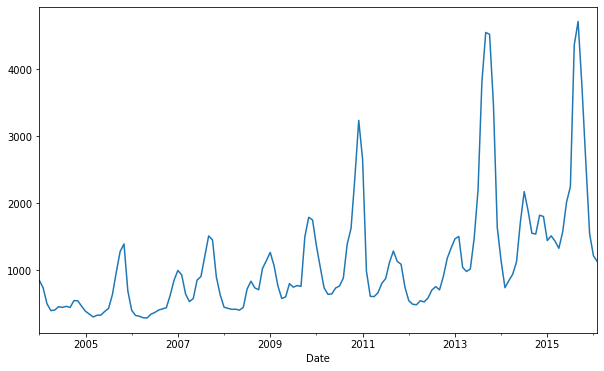

In [20]:
y.plot(figsize=(10,6))
mp.show()

We can see it consist of both trend and seasonality.

In [21]:
train=y.loc[:'2013-12-31']
train.shape

(120,)

In [22]:
test=y.loc['2014-01-31':]
test.shape

(26,)

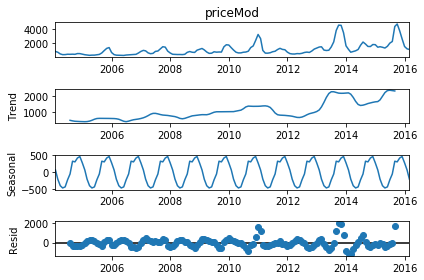

In [23]:
import statsmodels.api as sm
decomposition =sm.tsa.seasonal_decompose(y)
fig=decomposition.plot()
mp.show()

From this we can say the seasonal period is of 12 months

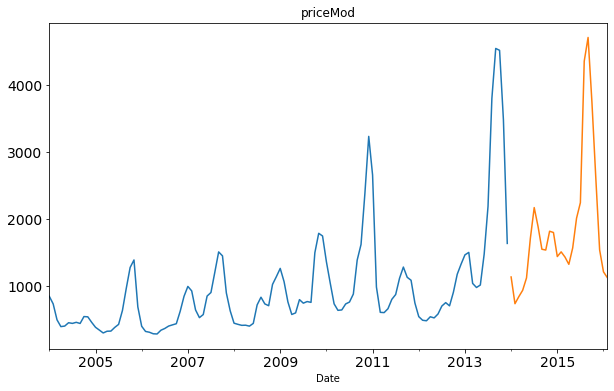

In [24]:
#plotting the data
train.plot(figsize=(10,6),title='priceMod',fontsize=14)
test.plot(figsize=(10,6),title='priceMod',fontsize=14)
mp.show()

# Exponential Smoothing Model

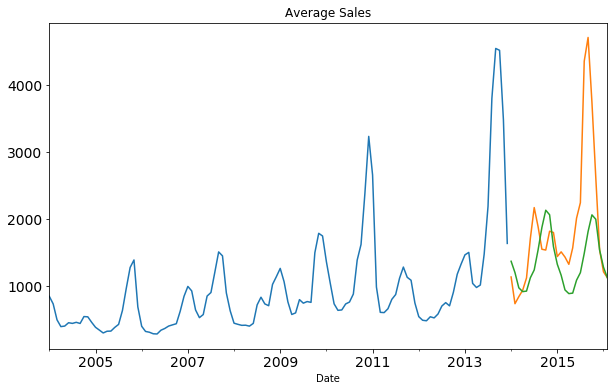

In [25]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()

fit1 = ExponentialSmoothing(train,seasonal_periods=12,trend='mul',seasonal='mul').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
mp.show()

In [26]:
fit1.aic

1410.293959897431

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,Holt_Winter_df['Holt_Winter']))
print(rmse)

981.8034927050603


# Sarimax model

In [28]:
import pmdarima as pm

In [29]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2398.095, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2185.897, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2535.797, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2183.908, Time=0.03 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2185.904, Time=0.04 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2179.426, Time=0.24 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=2155.130, Time=0.51 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=2154.040, Time=0.59 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=2155.296, Time=1.13 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=1.74 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=2348.171, Time=0.39 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=2109.165, Time=0.54 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=2120.967, Time=0.36 sec
 ARIMA(2,0,0)(3,0,0)[12] inte

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(y,order=(2,0,1),seasonal_order=(2,0,0,12)).fit()

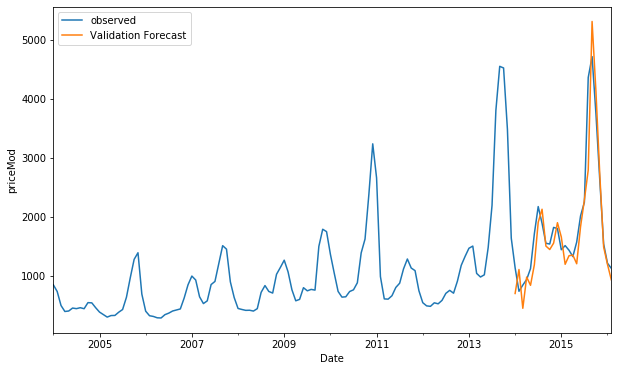

In [31]:
pred=model.get_prediction(start=pd.to_datetime('2014-01-31'))
#pred=model.get_forecast(steps=12)
mp.figure(figsize=(10,6))
ax=y.plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('priceMod')
mp.legend()
mp.show()

In [32]:
pred.predicted_mean

Date
2014-01-31    701.80
2014-02-28   1107.99
2014-03-31    450.94
2014-04-30    979.64
2014-05-31    840.30
2014-06-30   1188.95
2014-07-31   1908.82
2014-08-31   2129.01
2014-09-30   1505.40
2014-10-31   1446.65
2014-11-30   1554.74
2014-12-31   1901.09
2015-01-31   1660.11
2015-02-28   1196.44
2015-03-31   1341.51
2015-04-30   1352.48
2015-05-31   1205.56
2015-06-30   1832.34
2015-07-31   2287.46
2015-08-31   2793.78
2015-09-30   5309.93
2015-10-31   4127.55
2015-11-30   2719.95
2015-12-31   1491.35
2016-01-31   1195.52
2016-02-29    932.67
Freq: M, Name: predicted_mean, dtype: float64

In [33]:
Y_pred=pred.predicted_mean
Y_test=y['2014-01-31':]
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)

410.9163136948727


# SO AFTER BUILDING THE TIME SERIES MODEL WE CAN CLEARLY SEE THAT SARIMAX MODEL IS PERFORMING MUCH BETTER THAN EXPONENTIAL SMOOTHING WITH THE LOWEST RMSE VALUE 410.91

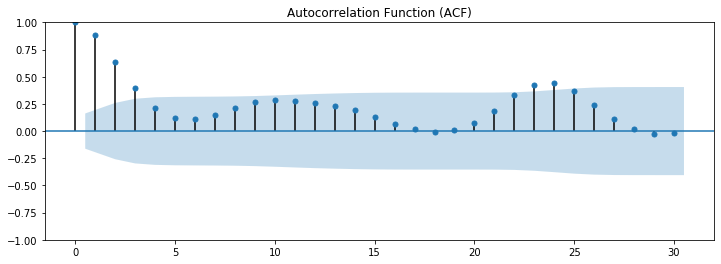

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = mp.subplots(figsize=(12, 4))
plot_acf(m, ax=ax, lags=30)
ax.set_title('Autocorrelation Function (ACF)')
mp.show()

In [35]:
#ACF (Autocorrelation Function) shows how correlated a time series is with its past values at different lags

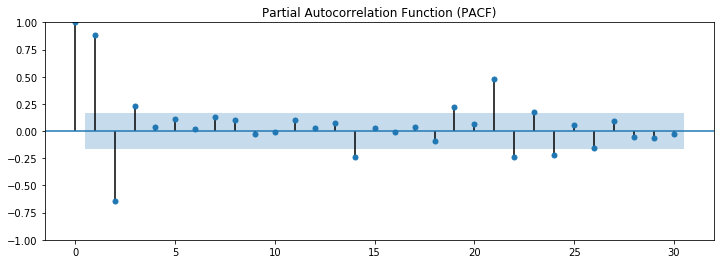

In [36]:
# Plot PACF
fig, ax = mp.subplots(figsize=(12, 4))
plot_pacf(m, ax=ax, lags=30)
ax.set_title('Partial Autocorrelation Function (PACF)')
mp.show()

In [37]:
#PACF (Partial Autocorrelation Function) shows the direct correlation between a time series and its past values, 
#removing the influence of intermediate lags.

# FUTURE PREDICTIOB FOR NEXT 12 MONTHS
We are going to make use of sarimax model for this. 

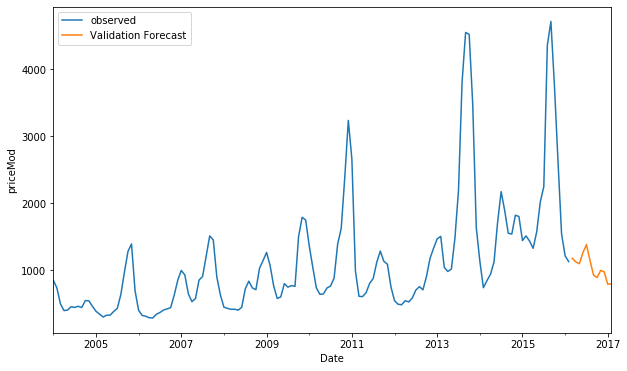

In [38]:
#pred=model.get_prediction(start=pd.to_datetime('2014-01-31'))
pred=model.get_forecast(steps=12)
mp.figure(figsize=(10,6))
ax=y.plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('priceMod')
mp.legend()
mp.show()

In [39]:
pred.predicted_mean

2016-03-31   1178.56
2016-04-30   1124.51
2016-05-31   1096.96
2016-06-30   1260.96
2016-07-31   1382.93
2016-08-31   1144.35
2016-09-30    925.58
2016-10-31    889.88
2016-11-30    997.74
2016-12-31    975.28
2017-01-31    789.48
2017-02-28    797.99
Freq: M, Name: predicted_mean, dtype: float64

# SO THIS IS THE FORECASTING FOR MUMBAI ONION MARKET FOR THE NEXT ONE YEAR